# <center><span style="font-size: 45px;">SALARY EDA & PREDICTION</span></center>



<img src="https://news.clearancejobs.com/wp-content/uploads/2017/04/Salary-Stacks-Up-818x300-720x300.png" alt="Image Description" width="700" height="300">


In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score

In [2]:
#First 7 Rows of Data
df = pd.read_csv('/kaggle/input/salary-prediction-data/salary_prediction_data.csv')
df.head(7)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
5,PhD,19,Rural,Director,27,Female,156312.936208
6,PhD,4,Rural,Director,60,Female,130567.649455


In [3]:
sh = df.shape
print(f"Shape of Data: {sh}")

Shape of Data: (1000, 7)


In [4]:
#Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [5]:
dup = (df.duplicated()).sum()
print(f"Data have {dup} duplicated Row")

Data have 0 duplicated Row


In [6]:
#Count the Num of Missing Values
df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [7]:
#Returns Data Types of Columns
df.dtypes

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object

In [8]:
#Generates Descriptive Statistics
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


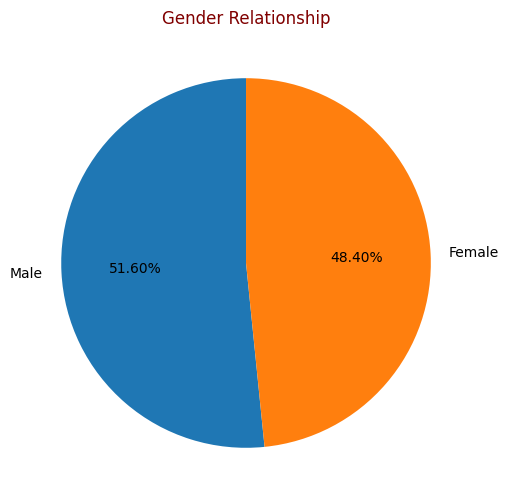

In [9]:
siz = df["Gender"].value_counts().tolist()
val = df["Gender"].unique().tolist()

plt.figure(figsize=(8,6))
plt.pie(siz,labels=val,autopct="%0.2f%%",startangle=90)
plt.title("Gender Relationship",color="Maroon")
plt.show()

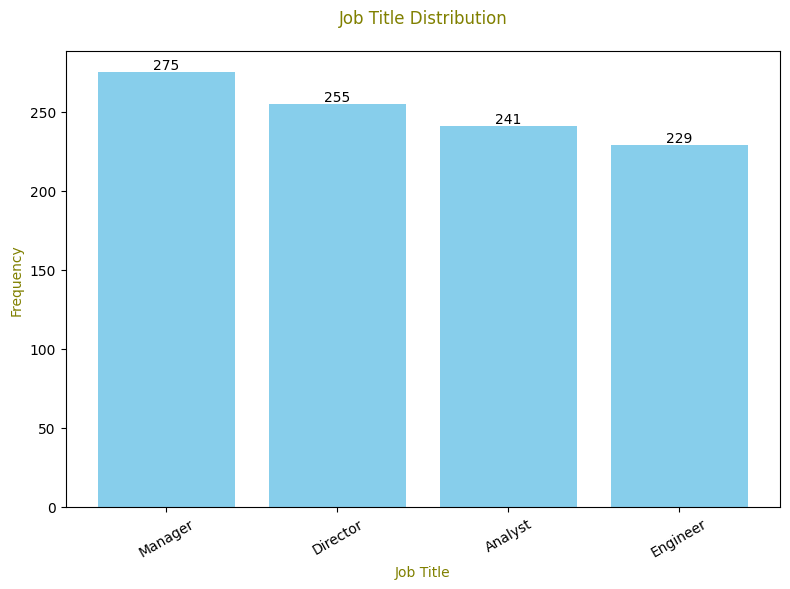

In [10]:
x = df["Job_Title"].value_counts().tolist()
y = df["Job_Title"].unique().tolist()


plt.figure(figsize=(8, 6))  
bars = plt.bar(y, x, color='skyblue')  
plt.title('Job Title Distribution', color='olive', pad=20)  
plt.xlabel('Job Title', color='olive') 
plt.ylabel('Frequency', color='olive')  
for bar, value in zip(bars, x):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha='center', va='bottom', color='black')
    
plt.xticks(rotation=30) 
plt.tight_layout()  
plt.show()

<Axes: >

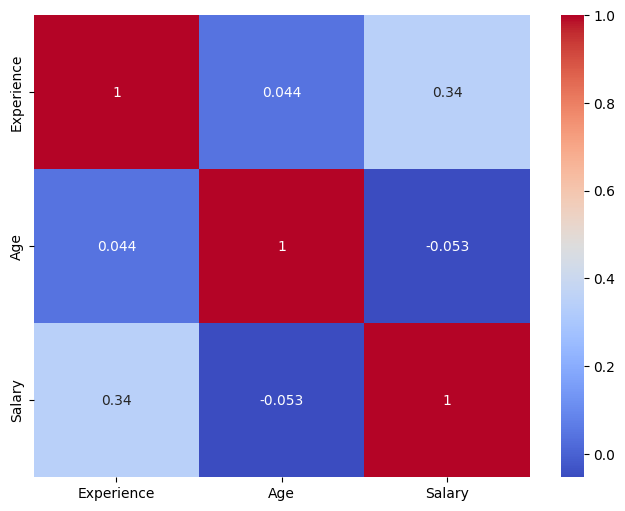

In [11]:
corr = df[["Experience","Age","Salary"]].corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(corr,annot=True,cmap='coolwarm')

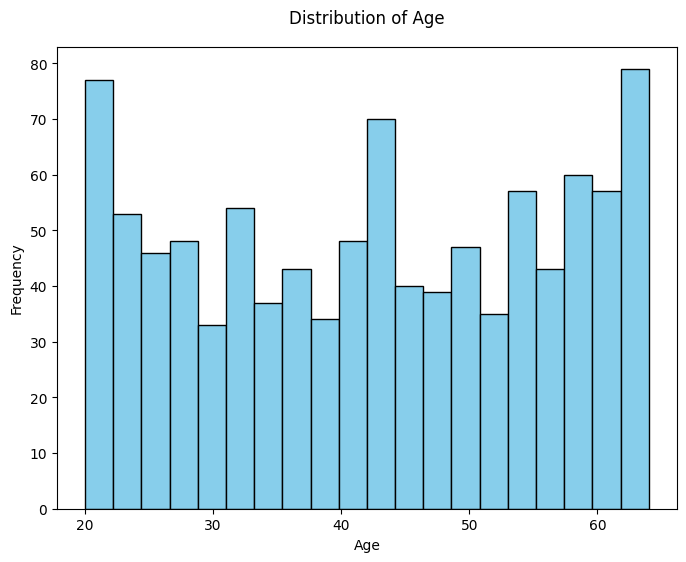

In [12]:
plt.figure(figsize=(8,6))
df['Age'].plot(kind="hist", bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Age',pad=17)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

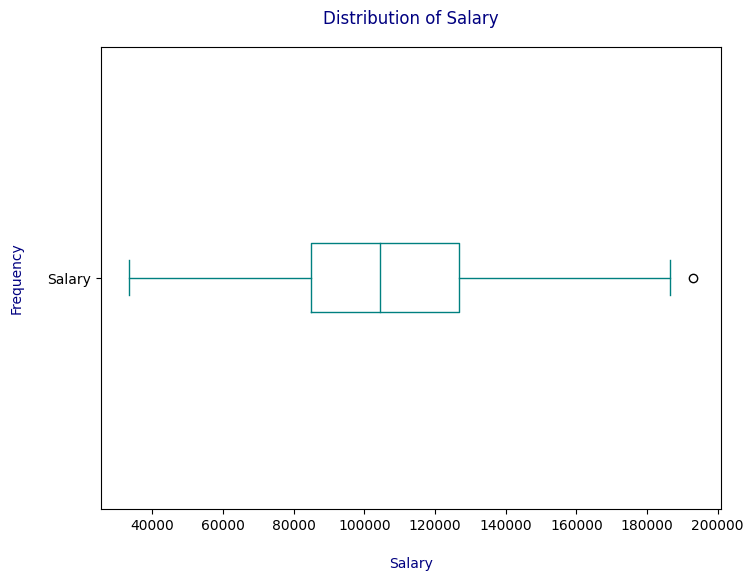

In [13]:
plt.figure(figsize=(8,6))
df['Salary'].plot(kind="box", color='teal', vert=False)

plt.title('Distribution of Salary', pad=17, color="navy")
plt.xlabel('Salary', color="navy", labelpad=17)
plt.ylabel('Frequency', color="navy", labelpad=17)
plt.show()


In [14]:
df['Gender'] = LabelEncoder().fit_transform(df["Gender"])
df['Job_Title'] = LabelEncoder().fit_transform(df["Job_Title"])
df['Education'] = LabelEncoder().fit_transform(df["Education"])
df['Location'] = LabelEncoder().fit_transform(df["Location"])

df.head(10)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175
5,3,19,0,1,27,0,156312.936208
6,3,4,0,1,60,0,130567.649455
7,3,13,1,1,49,0,148707.740759
8,0,20,2,2,25,0,95945.275429
9,3,14,2,0,58,0,133339.389682


In [15]:
df["Age"] = StandardScaler().fit_transform(df[["Age"]])
df["Salary"] = StandardScaler().fit_transform(df[["Salary"]])
df["Experience"] = StandardScaler().fit_transform(df[["Experience"]])

df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,-0.812169,2,3,1.516107,1,-0.741368
1,3,-0.452324,1,1,1.222045,1,1.311230
2,0,1.586793,1,3,1.369076,0,-0.274694
3,1,1.706741,0,1,0.192831,1,-0.308883
4,3,1.226949,2,0,-1.203961,0,0.941810


In [16]:
#Splitting Data into Training & Testing
X = df[["Experience","Job_Title","Age","Gender","Education","Location"]]
Y = df["Salary"]


x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
#Fitting Linear Regression Model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
#The Predicted Values
pre = model.predict(x_test)
pre

array([-1.11104934, -0.73731649,  0.34966388, -1.24558733, -0.58225447,
       -1.51621082, -1.46186095,  0.54771753,  0.76784137, -0.04005748,
        1.46907819,  1.25248725,  0.63753968, -1.13564056, -0.93769395,
       -1.42064007,  1.15832229, -0.96122464, -0.48142746, -0.83875017,
        0.50162628, -1.01990918, -0.81781486,  1.34386638,  1.41116018,
       -1.00246719,  0.41291075, -0.97081721,  1.46965617,  0.97493403,
        0.08980086, -0.61075094,  0.41766056,  0.60715376,  0.28423978,
        0.63790741, -0.81832263, -0.31550721, -0.74817092,  0.8996897 ,
        1.16265234, -0.04289372, -0.40414928, -0.15162871, -0.77497574,
       -0.32997396, -0.57789187,  0.48526815,  0.57359836,  0.48817888,
       -0.8534435 , -1.11463043, -1.36938873, -0.54353545, -0.04602099,
       -0.86744334, -0.10614223, -0.63527577, -0.30210861, -0.59732333,
        0.31456044,  0.85837454,  0.96504553, -0.57081633,  0.92239883,
        0.14468913, -0.21373208,  0.93896719, -0.70339307, -0.68

In [19]:
ACC = r2_score(y_test, pre)
rounded_ACC = round(ACC * 100, 3) 
print(f"The Accuracy of Prediction = {rounded_ACC} %")

The Accuracy of Prediction = 56.65 %
